# Avance Proyecto 1: Análisis eploratorio

### Subtítulo:
Descripción de por qué es necesario

In [10]:
#Código

### Cantidad de compras registradas por la tienda:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Cargar el archivo
df = pd.read_csv('customer_purchases_train.csv')
total_ventas = len(df)
print(f"Total de ventas registradas: {total_ventas}")

Total de ventas registradas: 7289


Visualizacion general


In [17]:
#Tipos de datos
print(df.dtypes)

#Valores nulos
print(df.isnull().sum())

purchase_id                 int64
customer_id                object
customer_date_of_birth     object
customer_gender            object
customer_signup_date       object
item_id                    object
item_title                 object
item_category              object
item_price                float64
item_img_filename          object
item_avg_rating           float64
item_num_ratings            int64
item_release_date          object
purchase_timestamp         object
customer_item_views         int64
purchase_item_rating      float64
purchase_device            object
label                       int64
dtype: object
purchase_id                  0
customer_id                  0
customer_date_of_birth       0
customer_gender           1551
customer_signup_date         0
item_id                      0
item_title                   0
item_category                0
item_price                   0
item_img_filename            0
item_avg_rating             45
item_num_ratings             0
it

### Cantidad de usuarios:


In [14]:
# Contar IDs únicos de clientes
unique_customers = df['customer_id'].nunique()

print(f"Cantidad de clientes únicos: {unique_customers}")


Cantidad de clientes únicos: 500


### Antiguedad de los clientes


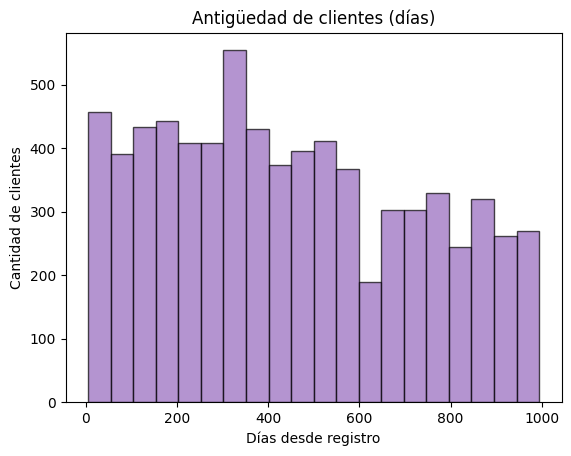

In [6]:
df['customer_signup_date'] = pd.to_datetime(df['customer_signup_date'])
df['antiguedad_dias'] = (pd.to_datetime('2025-09-21') - df['customer_signup_date']).dt.days

plt.hist(df['antiguedad_dias'], bins=20, color='#9467bd', edgecolor='black', alpha=0.7)
plt.title("Antigüedad de clientes (días)")
plt.xlabel("Días desde registro")
plt.ylabel("Cantidad de clientes")
plt.show()


### Clientes con múltiples compras

CLIENTES CON MÚLTIPLES COMPRAS:
Cliente CUST_0151: 34 compras
Cliente CUST_0477: 32 compras
Cliente CUST_0415: 30 compras
Cliente CUST_0442: 30 compras
Cliente CUST_0161: 30 compras
Cliente CUST_0498: 30 compras
Cliente CUST_0455: 28 compras
Cliente CUST_0483: 27 compras
Cliente CUST_0357: 27 compras
Cliente CUST_0205: 27 compras
Cliente CUST_0211: 26 compras
Cliente CUST_0425: 26 compras
Cliente CUST_0402: 26 compras
Cliente CUST_0412: 26 compras
Cliente CUST_0438: 26 compras
Cliente CUST_0449: 25 compras
Cliente CUST_0168: 25 compras
Cliente CUST_0192: 25 compras
Cliente CUST_0482: 25 compras
Cliente CUST_0484: 25 compras
Cliente CUST_0476: 24 compras
Cliente CUST_0464: 24 compras
Cliente CUST_0001: 24 compras
Cliente CUST_0456: 24 compras
Cliente CUST_0209: 24 compras
Cliente CUST_0496: 24 compras
Cliente CUST_0194: 24 compras
Cliente CUST_0230: 24 compras
Cliente CUST_0364: 23 compras
Cliente CUST_0260: 23 compras
Cliente CUST_0169: 23 compras
Cliente CUST_0500: 23 compras
Cliente 

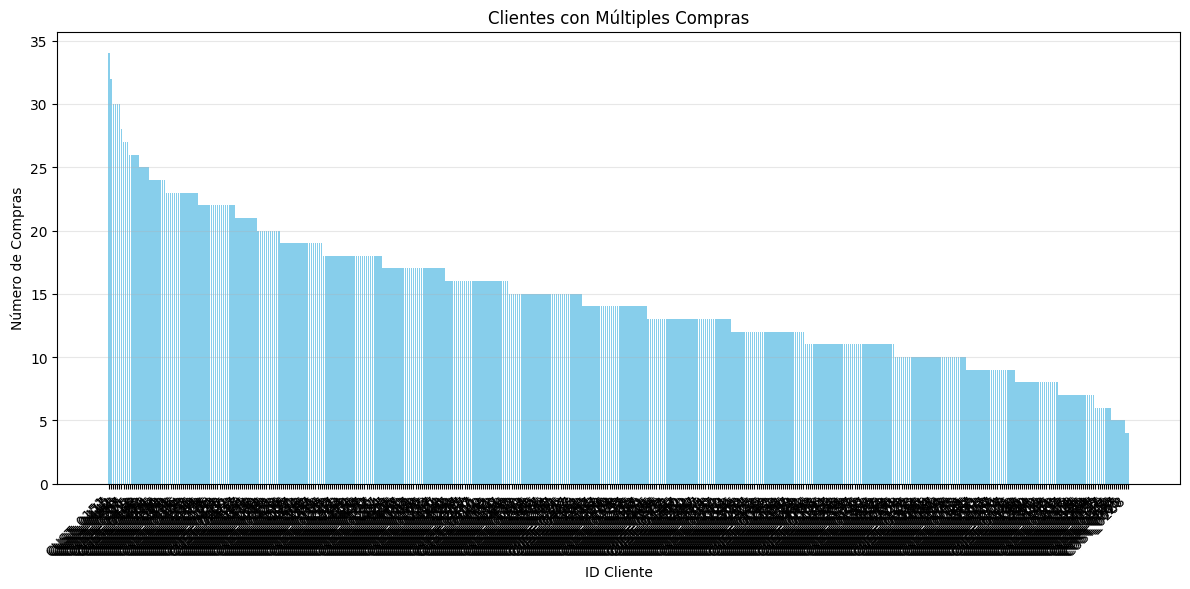

In [9]:
# Encontrar clientes con múltiples compras
customer_purchase_counts = df['customer_id'].value_counts()
customers_with_multiple_purchases = customer_purchase_counts[customer_purchase_counts > 1]

# Mostrar todos los clientes con múltiples compras
print("CLIENTES CON MÚLTIPLES COMPRAS:")
print("=" * 40)
for customer_id, count in customers_with_multiple_purchases.items():
    print(f"Cliente {customer_id}: {count} compras")

# Graficar
plt.figure(figsize=(12, 6))
plt.bar(customers_with_multiple_purchases.index, customers_with_multiple_purchases.values, color='skyblue')
plt.title('Clientes con Múltiples Compras')
plt.xlabel('ID Cliente')
plt.ylabel('Número de Compras')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()

### Antiguedad VS Numero de Compras 

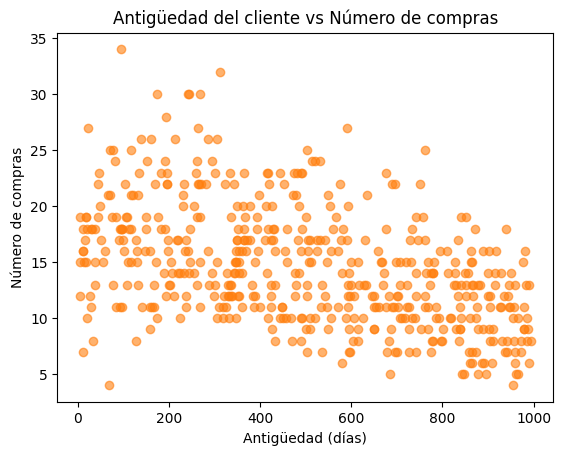

In [9]:
num_compras = df.groupby('customer_id')['purchase_id'].count()
antiguedad = df.groupby('customer_id')['antiguedad_dias'].first()

plt.scatter(antiguedad, num_compras, alpha=0.6, color='#ff7f0e')
plt.title("Antigüedad del cliente vs Número de compras")
plt.xlabel("Antigüedad (días)")
plt.ylabel("Número de compras")
plt.show()


### Frecuencias de Compras

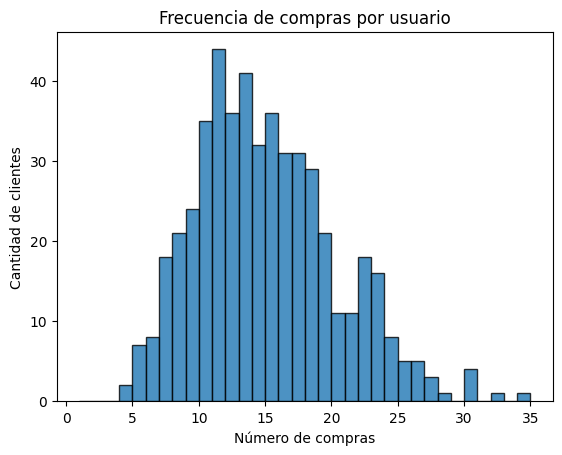

In [8]:
# Contar compras por usuario
compras_por_usuario = df['customer_id'].value_counts()

# Histograma por número exacto de compras
max_compras = compras_por_usuario.max()
plt.hist(compras_por_usuario, bins=range(1, max_compras+2), edgecolor='black', color='#1f77b4', alpha=0.8)
plt.title("Frecuencia de compras por usuario")
plt.xlabel("Número de compras")
plt.ylabel("Cantidad de clientes")
plt.show()


### Categorias Mas Compradas

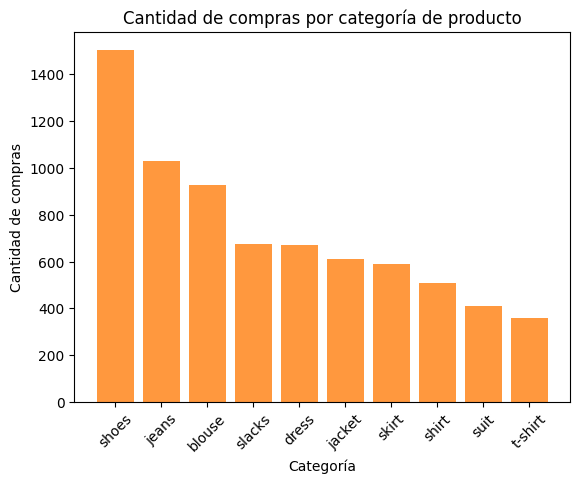

In [12]:
cat_counts = df['item_category'].value_counts()
plt.bar(cat_counts.index, cat_counts.values, color='#ff7f0e', alpha=0.8)
plt.title("Cantidad de compras por categoría de producto")
plt.xlabel("Categoría")
plt.ylabel("Cantidad de compras")
plt.xticks(rotation=45)
plt.show()

### Relacion Cliente Tipo de Ropa

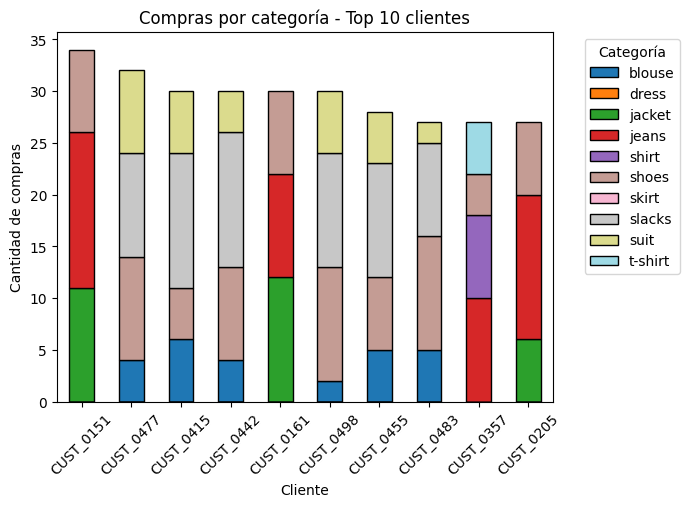

In [14]:
# Para los top 10 clientes
cliente_tipo_top10 = cliente_tipo.loc[compras_por_usuario.head(10).index]

cliente_tipo_top10.plot(kind='bar', stacked=True, edgecolor='black', colormap='tab20')
plt.title("Compras por categoría - Top 10 clientes")
plt.xlabel("Cliente")
plt.ylabel("Cantidad de compras")
plt.xticks(rotation=45)
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
